In [1]:
#读取数据
import numpy as np
NEW_FILE3 = 'D:/datasets/solar/new_data/new_data4.csv'
data = np.loadtxt(NEW_FILE3,delimiter=',',skiprows=1,usecols=(0,1,3,4,5,6,7))#时间、月份、温度、湿度、辐射、漫反射、功率
Ever_day = []
for i in range(812):
    tmp = data[i*21:i*21+21,:]
    Ever_day.append(np.mean(tmp, 0))#按列求平均
Ever_day = np.array(Ever_day)
X = Ever_day[:,1:]
from sklearn.cluster import DBSCAN,KMeans
#db = KMeans(n_clusters=3).fit(X_scaler)
#db = DBSCAN(eps = 0.4, min_samples = 10).fit(X_scaler)
db = DBSCAN(eps = 28, min_samples = 5).fit(X)
labels = db.labels_
Ever_day = np.c_[Ever_day,labels]#在Every_day后增加一列
class_one = []
class_two = []
class_three = []
for row in Ever_day:
    if row[-1] == -1:
        class_one.append(row[0])
    elif row[-1] == 0:
        class_two.append(row[0])
    else:
        class_three.append(row[0])
class_1 = class_two
sub_class = class_one + class_three
date,month,timepoint,temperature,humidity,radiation,diffuse,power = np.loadtxt(NEW_FILE3,delimiter=',',skiprows=1,unpack=True)
from sklearn import preprocessing
sub_date = []
sub_temperature =[]
sub_humidity = []
sub_radiation = []
sub_diffuse = []
sub_power = []
for i in range(len(date)):
    if date[i] in sub_class:
        sub_date.append(date[i])
        sub_temperature.append(temperature[i])
        sub_humidity.append(humidity[i])
        sub_radiation.append(radiation[i])
        sub_diffuse.append(diffuse[i])
        sub_power.append(power[i])

sub_date_d = []
sub_temperature_d =[]
sub_humidity_d = []
sub_radiation_d = []
sub_diffuse_d = []
sub_power_d = []
#按日的 温度 湿度  辐射 漫反射 功率
for i in range(len(sub_class)):
    sub_date_d.append(np.mean(sub_date[i*21:i*21+21]))
    sub_temperature_d.append(
        [np.max(sub_temperature[i*21:i*21+21]),np.mean(sub_temperature[i*21:i*21+21]),np.min(sub_temperature[i*21:i*21+21])])
    sub_humidity_d.append(
        [np.max(sub_humidity[i*21:i*21+21]),np.mean(sub_humidity[i*21:i*21+21]),np.min(sub_humidity[i*21:i*21+21])])
    sub_radiation_d.append(np.mean(sub_radiation[i*21:i*21+21]))
    sub_diffuse_d.append(np.mean(sub_diffuse[i*21:i*21+21]))
    sub_power_d.append(np.mean(sub_power[i*21:i*21+21]))
sub_date_d = np.reshape(sub_date_d,[-1,1])
sub_radiation_d = np.reshape(sub_radiation_d,[-1,1])
sub_diffuse_d = np.reshape(sub_diffuse_d,[-1,1])
sub_power_d = np.reshape(sub_power_d,[-1,1])
#归一化每日 温度 湿度 雨 辐射 漫反射
day_temperature_scaler = preprocessing.MinMaxScaler().fit_transform(sub_temperature_d)
day_humidity_scaler = preprocessing.MinMaxScaler().fit_transform(sub_humidity_d)
day_radiation_scaler = preprocessing.MinMaxScaler().fit_transform(sub_radiation_d)
day_diffuse_scaler = preprocessing.MinMaxScaler().fit_transform(sub_diffuse_d)
day_power_scaler = preprocessing.MinMaxScaler().fit_transform(sub_power_d)

sub_data = np.c_[sub_date_d,day_temperature_scaler,
                 day_humidity_scaler,day_radiation_scaler,day_diffuse_scaler,day_power_scaler]
X = sub_data[:,1:]
db = DBSCAN(eps=0.32, min_samples=9).fit(X)
labels = db.labels_
p = set(labels)
sub_data_labels = np.c_[sub_data,labels]
class_2 = []
class_3 = []
for row in sub_data_labels:
    if row[-1] == -1:
        class_2.append(row[0])
    else:
        class_3.append(row[0])
print(len(class_2),len(class_3))

147 84


In [2]:
import matplotlib.pyplot as plt
class_2_curve = []
class_3_curve = []
for i in range(len(sub_class)):
    if sub_date_d[i][0] in class_2:
        class_2_curve.append([sub_radiation_d[i][0],sub_power_d[i][0]])
    else:
        class_3_curve.append([sub_radiation_d[i][0],sub_power_d[i][0]])
class_2_curve = np.array(class_2_curve)
class_3_curve = np.array(class_3_curve)
plt.scatter(class_2_curve[:,0],class_2_curve[:,1],s = 3,c = 'r',label = 'Class2')
plt.scatter(class_3_curve[:,0],class_3_curve[:,1],s = 3,c = 'b',label = 'Class3')
plt.xlabel('辐射',fontproperties = 'Kaiti',fontsize = 20)
plt.ylabel('功率',fontproperties = 'Kaiti',fontsize = 20)
plt.title('子类二分类辐射 -- 功率散点图',fontproperties = 'Kaiti',fontsize = 25)
plt.legend()
plt.show()

<Figure size 640x480 with 1 Axes>

In [31]:
data = np.loadtxt(NEW_FILE3,delimiter=',',skiprows=1)
for i in range(len(data)):
    if data[i][1] == 1:data[i][1] = 17.938
    elif data[i][1] == 2:data[i][1] = 17.938
    elif data[i][1] == 3:data[i][1] = 16.067
    elif data[i][1] == 4:data[i][1] = 16.067
    elif data[i][1] == 5:data[i][1] = 16.067
    elif data[i][1] == 6:data[i][1] = 15.137
    elif data[i][1] == 7:data[i][1] = 15.137
    elif data[i][1] == 8:data[i][1] = 15.137
    elif data[i][1] == 9:data[i][1] = 17.714
    elif data[i][1] == 10:data[i][1] = 17.714
    elif data[i][1] == 11:data[i][1] = 17.714
    elif data[i][1] == 12:data[i][1] = 17.938
    
    if data[i][2] == 8.0:data[i][2] = 5.1096
    elif data[i][2] == 8.5:data[i][2] = 8.9351
    elif data[i][2] == 9.0:data[i][2] = 12.5525
    elif data[i][2] == 9.5:data[i][2] = 15.4875
    elif data[i][2] == 10.0:data[i][2] = 18.1367
    elif data[i][2] == 10.5:data[i][2] = 20.2583
    elif data[i][2] == 11.0:data[i][2] = 21.9231
    elif data[i][2] == 11.5:data[i][2] = 23.1655
    elif data[i][2] == 12.0:data[i][2] = 23.9481
    elif data[i][2] == 12.5:data[i][2] = 24.0809
    elif data[i][2] == 13.0:data[i][2] = 24.1543
    elif data[i][2] == 13.5:data[i][2] = 23.6692
    elif data[i][2] == 14.0:data[i][2] = 22.6423
    elif data[i][2] == 14.5:data[i][2] = 21.1091
    elif data[i][2] == 15.0:data[i][2] = 19.6702
    elif data[i][2] == 15.5:data[i][2] = 17.5288
    elif data[i][2] == 16.0:data[i][2] = 15.1380
    elif data[i][2] == 16.5:data[i][2] = 12.1955
    elif data[i][2] == 17.0:data[i][2] = 9.1260
    elif data[i][2] == 17.5:data[i][2] = 5.4909
    elif data[i][2] == 18.0:data[i][2] = 2.4679
    
    if data[i][-1] == 0:data[i][-1] = data[i][-3]*0.1

skip_day = [1,16,31,38,69,81,126,182,197,280,301,320,330,413,484,498,579,622,636,651,683,739,749,860]
#skip_day = skip_day + class_1 + class_2 + class_3 + class_4 + class_5 + class_6 + class_7
skip_day = skip_day + class_1 + class_3
all_data = []
for i in range(17052):
    if data[i][0] in skip_day:
        continue
    elif i%21 == 0:
        all_data.append(np.array([data[i][0],data[i][1],data[i][2],data[i][3],data[i][4],data[i][5],
                                  data[i][6],data[i-21][7],data[i-21][7],data[i][7]]))
    else:
        all_data.append(np.array([data[i][0],data[i][1],data[i][2],data[i][3],data[i][4],data[i][5],
                                  data[i][6],data[i-21][7],data[i-1][7],data[i][7]]))
print('class 2 :',len(all_data)/21)
print('测试数',int(len(all_data)/105))

class 2 : 135.0
测试数 27


## Linear Regression

In [60]:
f = []
from sklearn import linear_model 
for i in [1,2,3,4,5]:
    np.random.seed(i)
    test_list = np.random.randint(0,int(len(all_data)/21),size = int(len(all_data)/105))#有重复
    test_list = sorted(set(test_list))

    train_data = []
    train_label = []
    test_data = []
    test_label = []
    train_date = []
    test_date = []
    for i in range(int(len(all_data)/21)):
        for j in range(21):
            a = all_data[i*21+j]
            if i in test_list:
                test_data.append(a[1:-1])
                test_label.append(a[-1])
                test_date.append(a[0])
            else:
                train_data.append(a[1:-1])
                train_label.append(a[-1])
                train_date.append(a[0])
    LL = linear_model.LinearRegression()
    LL.fit(train_data,train_label)
    predict_power = LL.predict(test_data)
    mape = [abs(predict_power[i]-test_label[i])/test_label[i] for i in range(len(test_label))]
    f.append(np.mean(mape))
    print(' ',np.mean(mape))
print(np.mean(f))

  0.5793221813554686
  0.5142236227098332
  1.0742392729416979
  1.0998414324832688
  0.5392702809136382
0.7613793580807814


## LARs Lasso

In [61]:
f = []
for i in [1,2,3,4,5]:
    np.random.seed(i)
    test_list = np.random.randint(0,int(len(all_data)/21),size = int(len(all_data)/105))#有重复
    test_list = sorted(set(test_list))

    train_data = []
    train_label = []
    test_data = []
    test_label = []
    train_date = []
    test_date = []
    for i in range(int(len(all_data)/21)):
        for j in range(21):
            a = all_data[i*21+j]
            if i in test_list:
                test_data.append(a[1:-1])
                test_label.append(a[-1])
                test_date.append(a[0])
            else:
                train_data.append(a[1:-1])
                train_label.append(a[-1])
                train_date.append(a[0])
    
    LL = linear_model.LassoLars(alpha = 0.001)
    LL.fit(train_data,train_label)
    predict_power = LL.predict(test_data)
    mape = [abs(predict_power[i]-test_label[i])/test_label[i] for i in range(len(test_label))]
    f.append(np.mean(mape))
    print(' ',np.mean(mape))
print(np.mean(f))  

  0.577715105051605
  0.5136799768194926
  1.0635626368667197
  1.0891434927987036
  0.5371921389248981
0.7562586700922838


## SVM

In [105]:
f = []
from sklearn import svm
for x in [1,2,3,4,5]:
    np.random.seed(x)
    test_list = np.random.randint(0,int(len(all_data)/21),size = int(len(all_data)/105))#有重复
    test_list = sorted(set(test_list))

    train_data = []
    train_label = []
    test_data = []
    test_label = []
    train_date = []
    test_date = []
    for i in range(int(len(all_data)/21)):
        for j in range(21):
            a = all_data[i*21+j]
            if i in test_list:
                test_data.append(a[1:-1])
                test_label.append(a[-1])
                test_date.append(a[0])
            else:
                train_data.append(a[1:-1])
                train_label.append(a[-1])
                train_date.append(a[0])
    
    test_date = sorted(set(test_date))
    train_date = sorted(set(train_date))
    LL = svm.SVR(kernel = 'rbf', C = 900, gamma = 0.00000435)
    LL.fit(train_data,train_label)
    predict_power = LL.predict(test_data)
    mape = [abs(predict_power[i]-test_label[i])/test_label[i] for i in range(len(test_label))]
    print(x,np.mean(mape))
    f.append(np.mean(mape))
print('mean',np.mean(f))  

1 0.4030816696302834
2 0.3929585828984903
3 0.41760882990690534
4 0.37621384579392847
5 0.3911876357815202
mean 0.39621011280222557


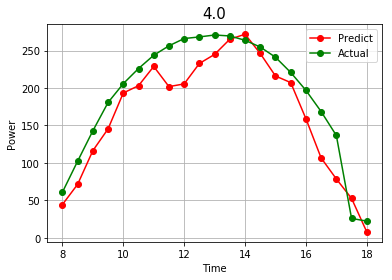

0.2263057210323216


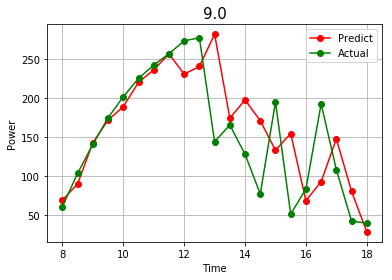

0.3855843539437305


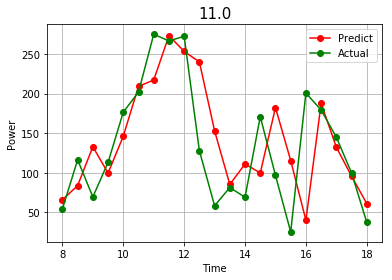

0.5556669448846911


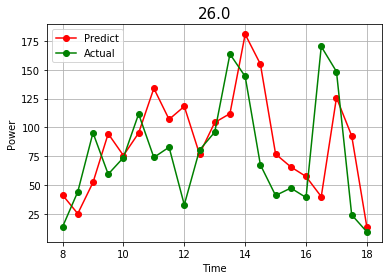

0.7308090579195534


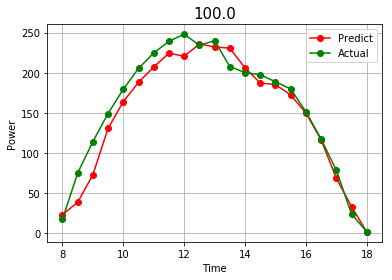

0.1256549584410483


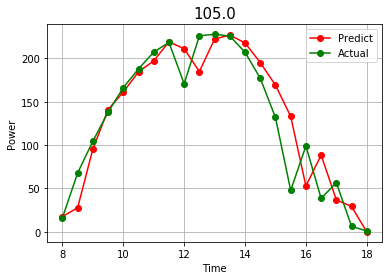

0.5126827993322237


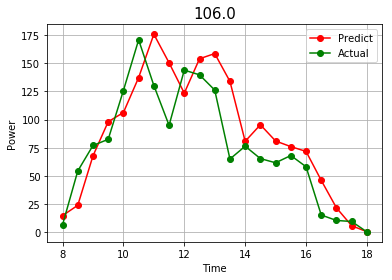

0.48127826779062666


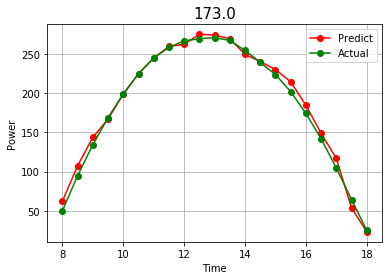

0.052436346392568556


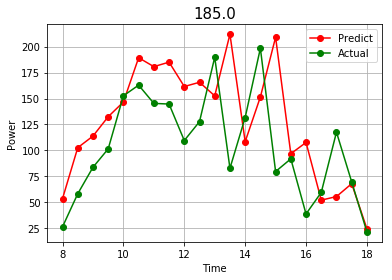

0.4942672411495166


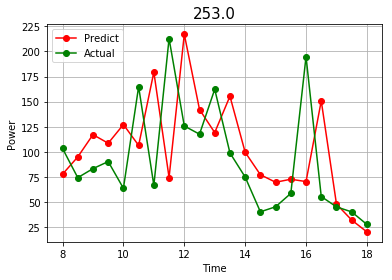

0.5504392599627301


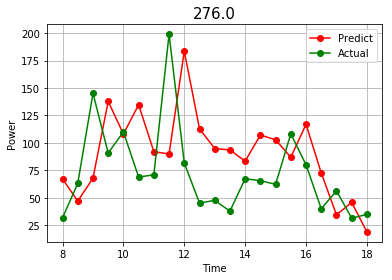

0.6535525868178601


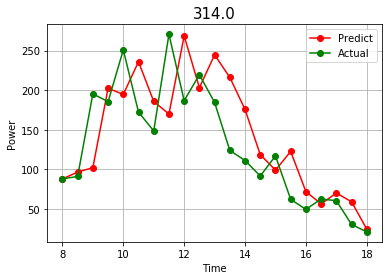

0.3451822439550207


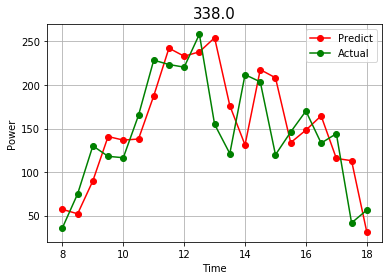

0.34408947366504


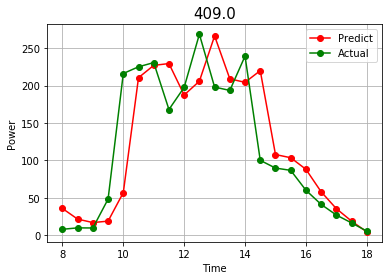

0.5399451743051619


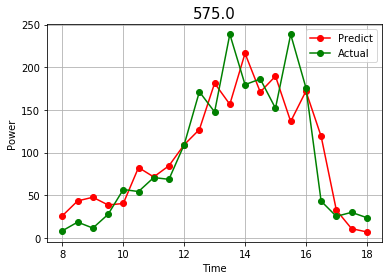

0.6241112911203544


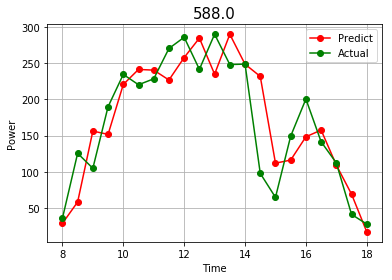

0.2960868812790385


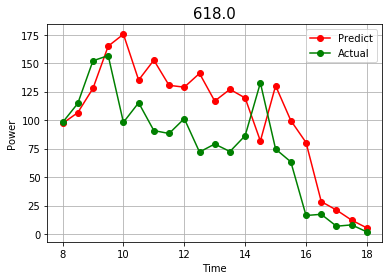

0.7619980716174097


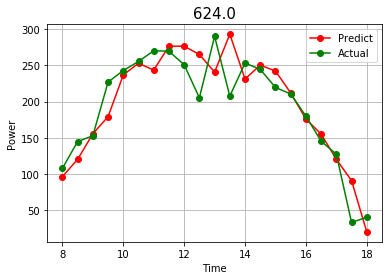

0.20223101371037225


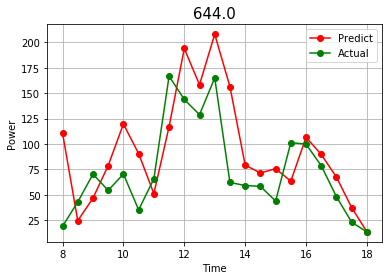

0.674569483448075


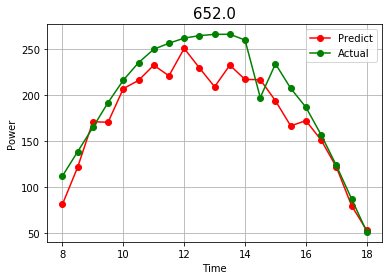

0.10785476561119826


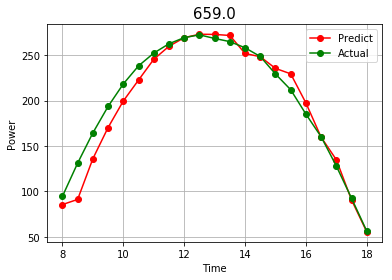

0.05814402233300417


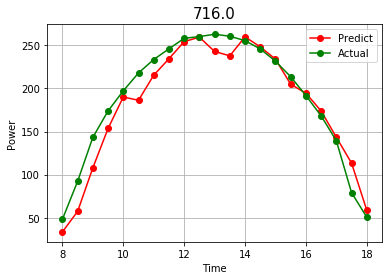

0.10874302640272322


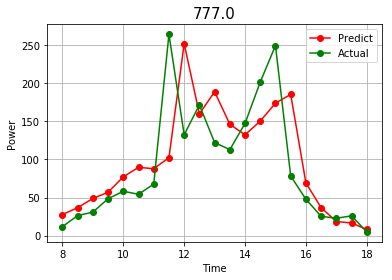

0.4914374812909132


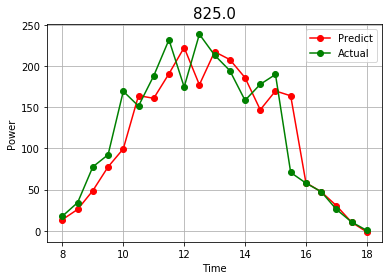

0.4523532965710442


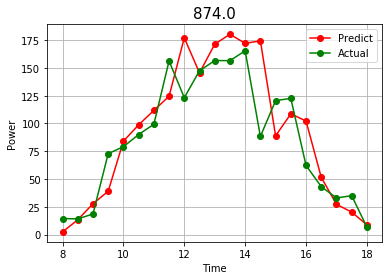

0.2938227829925972


In [26]:
import matplotlib.pyplot as plt
x = [8+i*0.5 for i in range(21)]
j = 0
for i in range(21*len(test_list)-21):
    if i%21 == 0:
        plt.plot(x,predict_power[i:i+21],'r-o',label = 'Predict')
        plt.plot(x,test_label[i:i+21],'g-o',label = 'Actual')
        plt.xlabel('Time')
        plt.ylabel('Power')
        title = test_date[j] 
        j+=1
        plt.title(title,fontsize = 15)
        plt.grid(True)
        plt.legend()
        plt.show()
        print(np.mean(mape[i:i+21]))
    else:
        continue

## Mutil Layers NN

In [33]:
import tensorflow as tf
INPUT_NODE = 8
OUTPUT_NODE = 1
LAYER1_NODE = 120
LAYER2_NODE = 110
LAYER3_NODE = 100
LAYER4_NODE = 90
LAYER5_NODE = 80
LAYER6_NODE = 70
LAYER7_NODE = 60


LEARNING_RATE = 0.006
REGULARIZATION_RATE = 0.0000001

TRAINING_EPOCH = 301
tf.set_random_seed(1)
def inference(input_data, regularizer):
    W1 = tf.Variable(tf.truncated_normal([INPUT_NODE,LAYER1_NODE],stddev=0.05))
    b1 = tf.Variable(tf.constant(0.1,shape=[LAYER1_NODE]))
    layer1 = tf.matmul(input_data,W1)+b1
    layer1 = tf.maximum(layer1, 0.1*layer1)
    if regularizer != None:
        tf.add_to_collection('losses',regularizer(W1))
    
    W2 = tf.Variable(tf.truncated_normal([LAYER1_NODE,LAYER2_NODE],stddev=0.05))
    b2 = tf.Variable(tf.constant(0.1,shape=[LAYER2_NODE]))
    layer2 = tf.matmul(layer1,W2)+b2
    layer2 = tf.maximum(layer2, 0.1*layer2)
    if regularizer != None:
        tf.add_to_collection('losses',regularizer(W2))
    
    W3 = tf.Variable(tf.truncated_normal([LAYER2_NODE,LAYER3_NODE],stddev=0.05))
    b3 = tf.Variable(tf.constant(0.1,shape=[LAYER3_NODE]))
    layer3 = tf.matmul(layer2,W3)+b3
    layer3 = tf.maximum(layer3, 0.1*layer3)
    if regularizer != None:
        tf.add_to_collection('losses',regularizer(W3))
    
    W4 = tf.Variable(tf.truncated_normal([LAYER3_NODE,LAYER4_NODE],stddev=0.05))
    b4 = tf.Variable(tf.constant(0.1,shape=[LAYER4_NODE]))
    layer4 = tf.matmul(layer3,W4)+b4
    layer4 = tf.maximum(layer4, 0.1*layer4)
    if regularizer != None:
        tf.add_to_collection('losses',regularizer(W4))
        
        
    W5 = tf.Variable(tf.truncated_normal([LAYER4_NODE,LAYER5_NODE],stddev=0.05))
    b5 = tf.Variable(tf.constant(0.1,shape=[LAYER5_NODE]))
    layer5 = tf.matmul(layer4,W5)+b5
    layer5 = tf.maximum(layer5, 0.1*layer5)
    if regularizer != None:
        tf.add_to_collection('losses',regularizer(W5))
        
        
    W6 = tf.Variable(tf.truncated_normal([LAYER5_NODE,LAYER6_NODE],stddev=0.05))
    b6 = tf.Variable(tf.constant(0.1,shape=[LAYER6_NODE]))
    layer6 = tf.matmul(layer5,W6)+b6
    layer6 = tf.maximum(layer6, 0.1*layer6)
    if regularizer != None:
        tf.add_to_collection('losses',regularizer(W6))
        
    W7 = tf.Variable(tf.truncated_normal([LAYER6_NODE,LAYER7_NODE],stddev=0.05))
    b7 = tf.Variable(tf.constant(0.1,shape=[LAYER7_NODE]))
    layer7 = tf.matmul(layer6,W7)+b7
    layer7 = tf.maximum(layer7, 0.1*layer7)
    if regularizer != None:
        tf.add_to_collection('losses',regularizer(W6))
    
    W_o = tf.Variable(tf.truncated_normal([LAYER7_NODE,OUTPUT_NODE],stddev=0.05))
    b_o = tf.Variable(tf.constant(0.1,shape=[OUTPUT_NODE]))
    pre = tf.nn.relu(tf.matmul(layer7,W_o)+b_o)
    if regularizer != None:
        tf.add_to_collection('losses',regularizer(W_o))
        
    return pre

input_data = tf.placeholder(tf.float32,[None,INPUT_NODE])
input_label = tf.placeholder(tf.float32,[None,OUTPUT_NODE])
regularizer = tf.contrib.layers.l2_regularizer(REGULARIZATION_RATE)

pre = inference(input_data,regularizer)
test_pre = inference(input_data,None)
cost = tf.reduce_mean(tf.square(input_label - pre)) + tf.add_n(tf.get_collection('losses'))
train_step = tf.train.AdamOptimizer(LEARNING_RATE).minimize(cost)


with tf.Session() as sess:
    f = []
    for i in [1,2,3,4,5]:
        np.random.seed(i)
        test_list = np.random.randint(0,int(len(all_data)/21),size = 120)#有重复
        test_list = sorted(set(test_list))

        train_data = []
        train_label = []
        test_data = []
        test_label = []
        train_date = []
        test_date = []
        for i in range(int(len(all_data)/21)):
            for j in range(21):
                a = all_data[i*21+j]
                if i in test_list:
                    test_data.append(a[1:-1])
                    test_label.append(a[-1])
                    test_date.append(a[0])
                else:
                    train_data.append(a[1:-1])
                    train_label.append(a[-1])
                    train_date.append(a[0])
        BATCH_SIZE = len(train_data)
        tf.global_variables_initializer().run()
        start = 0
        end = start+BATCH_SIZE
        for i in range(int(TRAINING_EPOCH*len(train_data)/BATCH_SIZE)):
            xs = train_data[start:end]
            ys = train_label[start:end]
            try:
                ys = np.reshape(ys,[BATCH_SIZE,1])
            except:
                print(len(ys))
                print(len(train_data))
            _, loss = sess.run([train_step,cost],feed_dict={input_data:xs, input_label:ys})
            if end == len(train_data):
                start = 0
                end = BATCH_SIZE
            else:
                start = end
                end+=BATCH_SIZE
            if i%(50*len(train_data)/BATCH_SIZE) == 0:
                print('After %d epoch,loss value:%g'%(i/(len(train_data)/BATCH_SIZE),loss))
        print('Training Finished')

        predict_power = sess.run(pre,feed_dict={input_data:test_data})

        mape = [abs(predict_power[i]-test_label[i])/test_label[i] for i in range(21*len(test_list))]
        print('TEST MAPE:',np.mean(mape))
        f.append(np.mean(mape))
    print(np.mean(f))

After 0 epoch,loss value:23836.5
After 50 epoch,loss value:2152.2
After 100 epoch,loss value:1701.02
After 150 epoch,loss value:1657.46
After 200 epoch,loss value:1621.4
After 250 epoch,loss value:1589.32
After 300 epoch,loss value:1559.74
Training Finished
TEST MAPE: 0.45425552
After 0 epoch,loss value:23735.2
After 50 epoch,loss value:2183.27
After 100 epoch,loss value:1904.54
After 150 epoch,loss value:1837.44
After 200 epoch,loss value:1784.89
After 250 epoch,loss value:1738.86
After 300 epoch,loss value:1685.69
Training Finished
TEST MAPE: 0.44327343
After 0 epoch,loss value:23236.8
After 50 epoch,loss value:2360.15
After 100 epoch,loss value:2023.09
After 150 epoch,loss value:1946.31
After 200 epoch,loss value:1896.08
After 250 epoch,loss value:1863.34
After 300 epoch,loss value:1815.88
Training Finished
TEST MAPE: 0.52858835
After 0 epoch,loss value:25640.8
After 50 epoch,loss value:2454.17
After 100 epoch,loss value:1923.33
After 150 epoch,loss value:1857.47
After 200 epoch,los